In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
# Read the individual CSV datasets
Whale_returns_data = Path("whale_returns.csv")
whale_data = pd.read_csv(Whale_returns_data, index_col="Date")
whale_data.head()
algo_data = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date")
sp500_data = Path("sp500_history.csv")
sp500_df = pd.read_csv(Whale_returns_data, index_col="Date")

In [3]:
 # Count nulls
whale_data.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
 # Drop nulls
whale_data.dropna(inplace=True)
whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
#whale_returns
whale_returns = whale_data.pct_change()
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672


In [6]:
# Reading algorithmic returns
algo_returns = algo_df.pct_change()
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963
2014-06-12,-1.005932,0.021230


In [7]:
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
 # Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [9]:
# Reading S&P 500 Closing Prices
sp500_data = Path("sp500_history.csv")
sp500 = pd.read_csv(
    sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
 # Check Data Types
sp500_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [11]:
 # Fix Data Types


In [12]:
 # Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672


In [13]:
 # Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672
...,...,...,...,...
2019-04-25,-1.124733,-2.279801,0.288325,-1.759149
2019-04-26,-29.607053,-8.097525,-3.397536,1.152302
2019-04-29,-0.846082,-0.703202,-0.494071,-0.499394


In [14]:
# Rename `Close` Column to be specific to this portfolio.

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_first_returns = pd.concat([whale_returns, sp500_returns, algo_returns], axis="columns", join="inner")
combined_first_returns.dropna(inplace=True)
combined_first_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766
2015-03-05,0.800968,0.257544,-1.929234,0.596558,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163


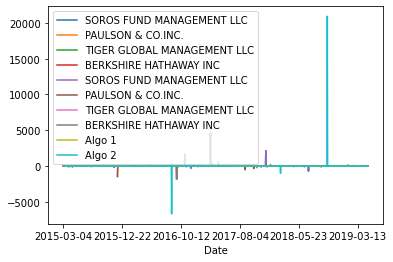

In [17]:
 # Plot daily returns of all portfolios
returns_plot = combined_first_returns.plot()

In [18]:
#combined dataframe
combined_returns_df =  pd.concat([whale_returns, sp500_returns, algo_returns],axis="columns",join="inner")
combined_returns_df.sort_index(inplace=True)
combined_returns_df.dropna(inplace=True)
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766
2015-03-05,0.800968,0.257544,-1.929234,0.596558,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163


In [20]:
 # Calculate Daily Returns
combined_daily_returns = combined_returns_df.pct_change()
combined_daily_returns.dropna(inplace=True)
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,,,
2015-03-05,-1.289988,-1.156012,-1.468984,-1.363449,-1.289988,-1.156012,-1.468984,-1.363449,-1.259704,-1.222647
2015-03-06,-4.706095,-8.287443,1.385337,-5.940478,-4.706095,-8.287443,1.385337,-5.940478,-5.714254,-5.625914
2015-03-09,-0.638313,0.162729,-0.632996,-0.703510,-0.638313,0.162729,-0.632996,-0.703510,-0.976392,-0.694949
2015-03-10,16.347725,0.037439,0.816193,-6.600194,16.347725,0.037439,0.816193,-6.600194,-8.526717,8.272708
2015-03-11,-0.925322,-0.131277,-0.584604,-1.180286,-0.925322,-0.131277,-0.584604,-1.180286,3.232771,-0.898350


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

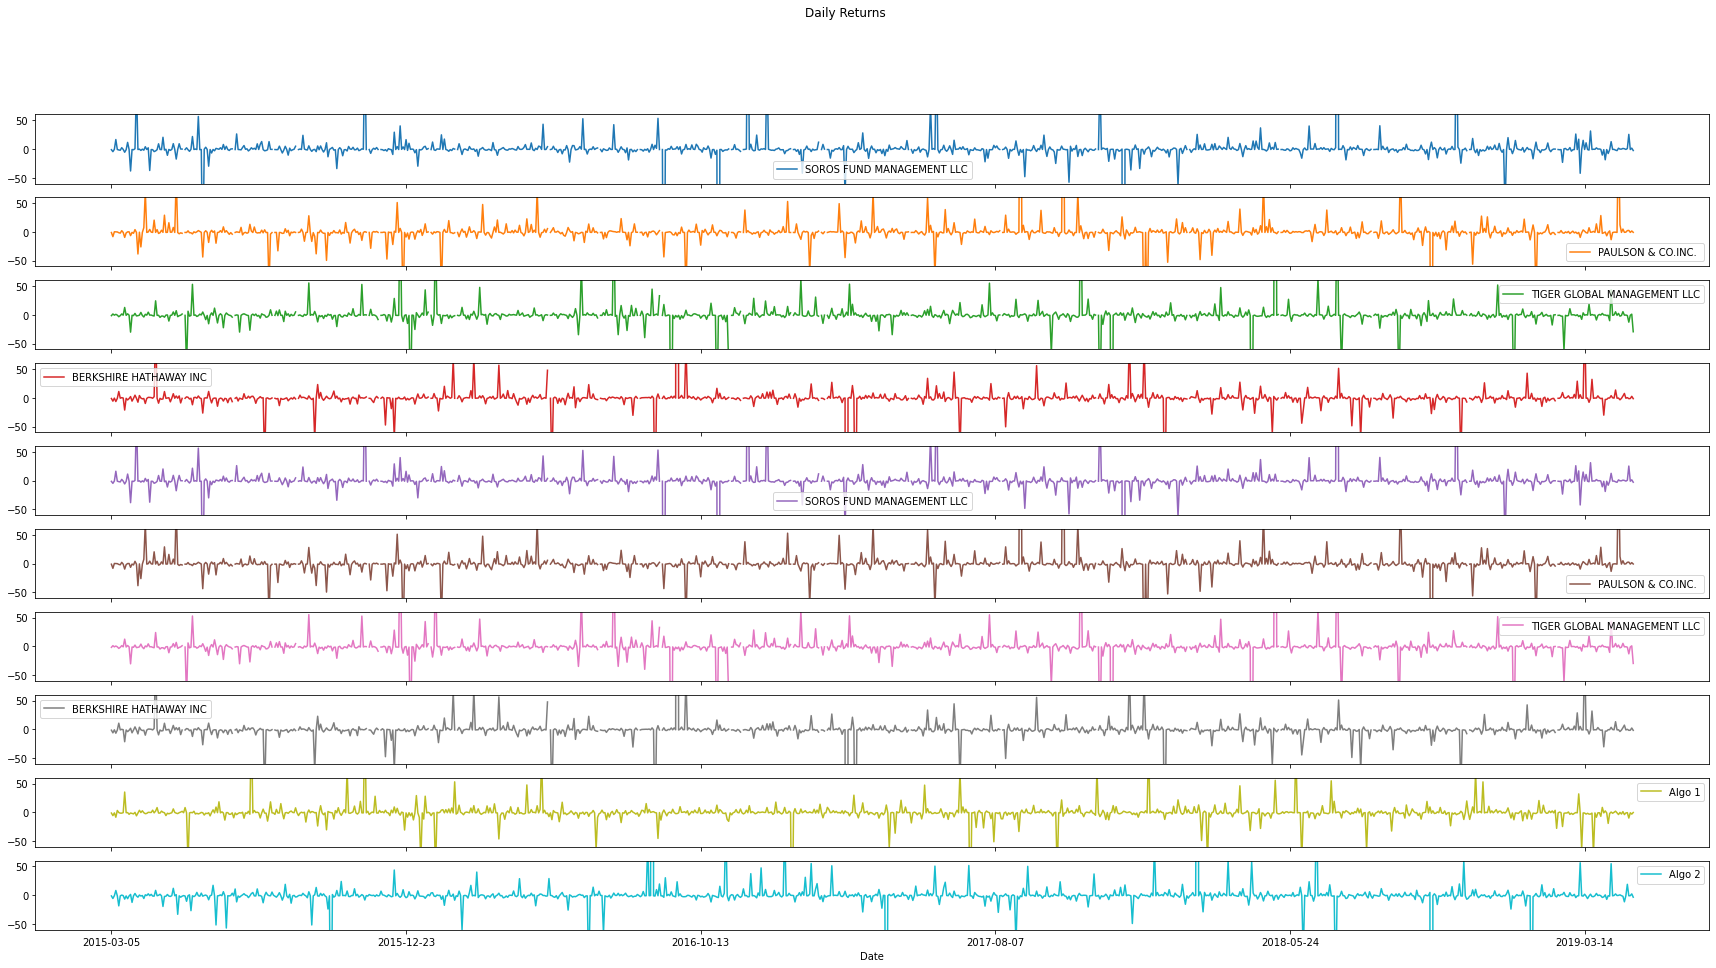

In [31]:
 # Plot Daily Returns
combined_daily_returns.plot(kind="line", title = "Daily Returns", figsize = (30,15), subplots = True, ylim =(-60, 60))

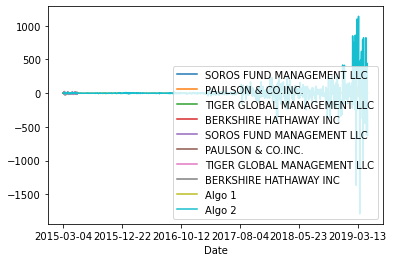

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod() -1
cumulative_returns

# Plot cumulative returns
cumulative_returns_plot = cumulative_returns.plot()

In [20]:
#NEXT_STEP--> RISK ANALYSIS

In [22]:
 #  risk
volatility = combined_daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

Algo 1                           298.956677
Algo 2                         10877.093749
SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<AxesSubplot:>

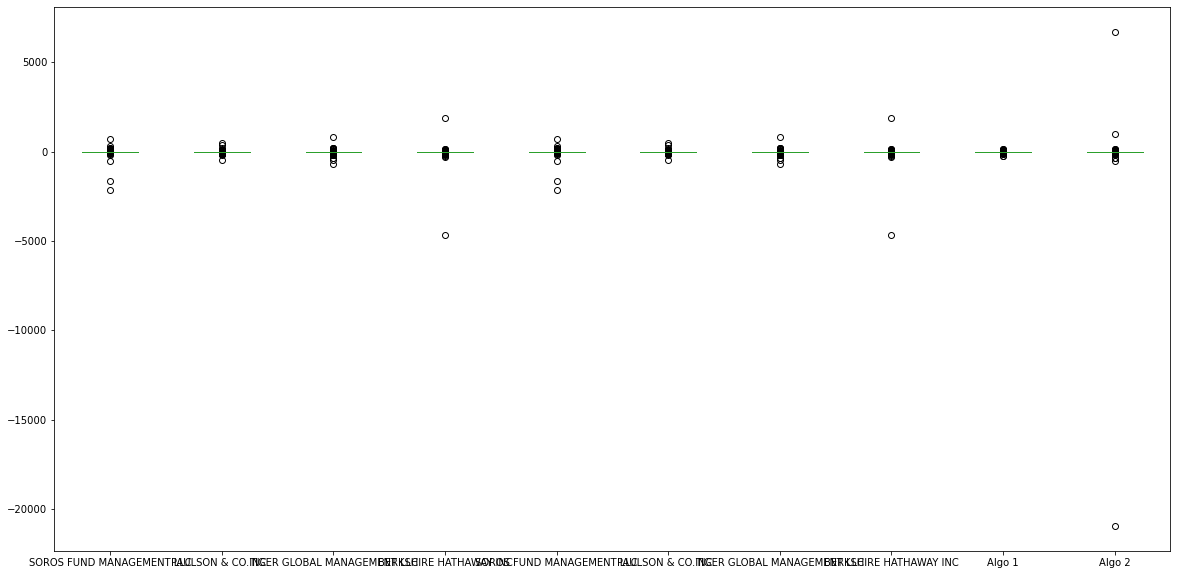

In [23]:
# Box plot to visually show risk
combined_daily_returns.plot(kind = "box", figsize = (20,10))

In [24]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns_df.std()
combined_std

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                          15.760366
Algo 2                         684.489715
dtype: float64

In [25]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_returns_df['sp500_returns'].std()

# Determine which portfolios are riskier than the S&P 500
riskier_portfolio = combined_std.index[combined_std > sp500_std].tolist()
print(f"{riskier_portfolio} are riskier than sp500")
                                       

KeyError: 'sp500_returns'

In [26]:
 # Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std + np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                          31.634874
Algo 2                         700.364223
dtype: float64

In [25]:
#NEXT_STEP--> ROLLING STATISTICS

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_return_21day = combined_df.rolling(window=21).std().dropna
# Plot the rolling standard deviation
std_return_21day.plot(title = "Rolling Standard Deviation: 21-day", figsize = (20,10))

AttributeError: 'function' object has no attribute 'plot'

<AxesSubplot:>

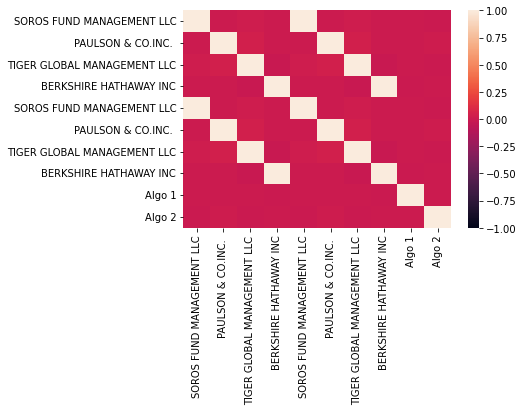

In [27]:
 # Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1)

In [28]:
# Calculate covariance of a single portfolio
algo1_cov = combined_df["Ago 1"].cov(combined_returns["S&P500 Returns"]
# Calculate variance of S&P 500
sp500_var = combined_df["S&P500 Returns"].var
# Computing beta
algo1_beta = algo_cov / sp500_var
# Plot beta trend
algo1_cov21 = combined_df["Algo 1"].rolling(window=21).cov(combined_df["S&P500 Returns"])
sp500_var21 = combined_df["S&P500 Returns"].rolling(window=21).var()
algo1_beta21.plot()

SyntaxError: invalid syntax (2174458449.py, line 4)

In [29]:
 # Use `ewm` to calculate the rolling window

In [30]:
 # Reading data from 1st stock
googl_df = pd.read_csv(Path("goog_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
googl_df.drop(['Symbol'], axis=1, inplace = True)
googl_df.columns = ['GOOG']
googl_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [31]:
 # Reading data from 2nd stock
aapl_df = pd.read_csv(Path("aapl_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.drop(['Symbol'], axis=1, inplace = True)
aapl_df.columns = ['AAPL']
aapl_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [32]:
 # Reading data from 3rd stock
Cost_df = pd.read_csv(Path("aapl_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
Cost_df.drop(['Symbol'], axis=1, inplace = True)
Cost_df.columns = ['COST']
Cost_df

,COST
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [54]:
 # Combine all stocks in a single DataFrame
combined_df = pd.concat([googl_df, aapl_df, Cost_df], axis="columns", join="inner")
combined_df

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,200.72
2019-05-08,1166.27,202.90,202.90
2019-05-07,1174.10,202.86,202.86
2019-05-06,1189.39,208.48,208.48
2019-05-03,1185.40,211.75,211.75
...,...,...,...
2018-05-17,1078.59,186.99,186.99
2018-05-16,1081.77,188.18,188.18
2018-05-15,1079.23,186.44,186.44


In [34]:
 # Reset Date index
combined_df.sort_index(inplace=True)
combined_df

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,188.59
2018-05-14,1100.20,188.15,188.15
2018-05-15,1079.23,186.44,186.44
2018-05-16,1081.77,188.18,188.18
2018-05-17,1078.59,186.99,186.99
...,...,...,...
2019-05-03,1185.40,211.75,211.75
2019-05-06,1189.39,208.48,208.48
2019-05-07,1174.10,202.86,202.86


In [35]:
 # Reorganize portfolio data by having a column per symbol

In [36]:
# Calculate daily returns
daily_returns_df =combined_df.pct_change()

# Drop NAs
daily_returns_df.dropna(inplace = True)

# Display sample data
daily_returns_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,-0.002333
2018-05-15,-0.019060,-0.009088,-0.009088
2018-05-16,0.002354,0.009333,0.009333
2018-05-17,-0.002940,-0.006324,-0.006324
2018-05-18,-0.011339,-0.003637,-0.003637


In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
portfolio_returns = combined_daily_returns.dot(weights)


# Display sample data
portfolio_returns.head()

ValueError: Dot product shape mismatch, (1034, 10) vs (3,)

In [40]:
 # Join your returns DataFrame to the original returns DataFrame
new_combined_df = pd.concat([combined_first_returns, combined_returns_df], axis="columns", join="inner")
new_combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,,,,,,,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-2.762070,-1.650792,4.113646,-1.641381,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766
2015-03-05,0.800968,0.257544,-1.929234,0.596558,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.800968,0.257544,-1.929234,0.596558,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-2.968465,-1.876837,-4.601872,-2.947282,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-1.073656,-2.182252,-1.688907,-0.873840,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,-18.625495,-2.263954,-3.067380,4.893672,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-1.124733,-2.279801,0.288325,-1.759149,-1.124733,-2.279801,0.288325,-1.759149,-0.376856,-19.155605,-1.124733,-2.279801,0.288325,-1.759149,-1.124733,-2.279801,0.288325,-1.759149,-0.376856,-19.155605
2019-04-26,-29.607053,-8.097525,-3.397536,1.152302,-29.607053,-8.097525,-3.397536,1.152302,3.368191,-1.725170,-29.607053,-8.097525,-3.397536,1.152302,-29.607053,-8.097525,-3.397536,1.152302,3.368191,-1.725170
2019-04-29,-0.846082,-0.703202,-0.494071,-0.499394,-0.846082,-0.703202,-0.494071,-0.499394,0.746958,-0.461657,-0.846082,-0.703202,-0.494071,-0.499394,-0.846082,-0.703202,-0.494071,-0.499394,0.746958,-0.461657


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_df = pd.concat([combined_returns_df, combined_first_returns], axis="columns", join="inner")
new_combined_df.columns = ["Weighted Portfolio Returns", "GOOG", "APPL", "COST"]
new_combined_df.dropna(inplace=True)
new_combined_df

ValueError: Length mismatch: Expected axis has 20 elements, new values have 4 elements

In [44]:
 # Calculate the annualized `std`
annualized_std = combined_returns_df.std()
annualized_std

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                          15.760366
Algo 2                         684.489715
dtype: float64

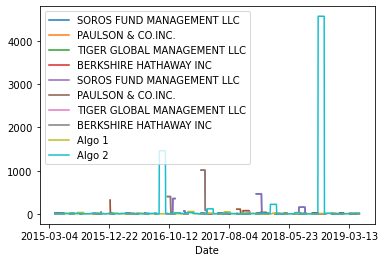

In [45]:
# Calculate rolling standard deviation &  Plot rolling standard deviation
std_roll_21day = combined_returns_df.rolling(window=21).std().plot()


In [35]:
 # Calculate and plot the correlation
correlation = combined_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.002971,0.022290,0.000439,1.000000,0.002971,0.022290,0.000439,0.000424,-0.005754
PAULSON & CO.INC.,0.002971,1.000000,0.035604,0.002028,0.002971,1.000000,0.035604,0.002028,0.005818,0.010890
TIGER GLOBAL MANAGEMENT LLC,0.022290,0.035604,1.000000,-0.014547,0.022290,0.035604,1.000000,-0.014547,0.007583,-0.004665
BERKSHIRE HATHAWAY INC,0.000439,0.002028,-0.014547,1.000000,0.000439,0.002028,-0.014547,1.000000,-0.005650,0.003771
SOROS FUND MANAGEMENT LLC,1.000000,0.002971,0.022290,0.000439,1.000000,0.002971,0.022290,0.000439,0.000424,-0.005754
PAULSON & CO.INC.,0.002971,1.000000,0.035604,0.002028,0.002971,1.000000,0.035604,0.002028,0.005818,0.010890
TIGER GLOBAL MANAGEMENT LLC,0.022290,0.035604,1.000000,-0.014547,0.022290,0.035604,1.000000,-0.014547,0.007583,-0.004665
BERKSHIRE HATHAWAY INC,0.000439,0.002028,-0.014547,1.000000,0.000439,0.002028,-0.014547,1.000000,-0.005650,0.003771
Algo 1,0.000424,0.005818,0.007583,-0.005650,0.000424,0.005818,0.007583,-0.005650,1.000000,0.000466
Algo 2,-0.005754,0.010890,-0.004665,0.003771,-0.005754,0.010890,-0.004665,0.003771,0.000466,1.000000


<AxesSubplot:>

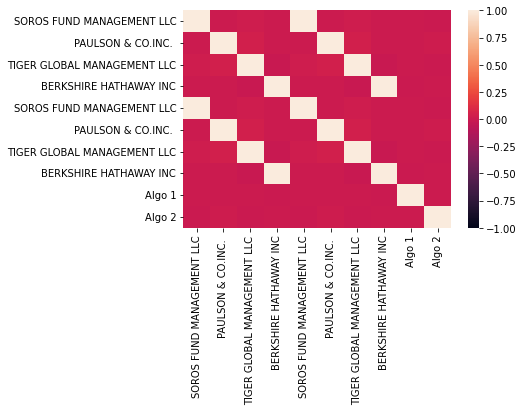

In [36]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [51]:
 # Calculate and plot Beta
custom_port_cov_rolling60 = total_returns["My Portfolio"].rolling(window=60).cov(total_returns["S&P500 Returns"])
sp500_var_rolling60 = total_returns["S&P500 Returns].rolling(window=60).var()
custom_port_beta = custom_port_cov_rolling60 / sp500_var_rolling60
custom_port_beta.plot(title = "Rolling 60-day Beta for My Portfolio", figsize = (20,10)


In [ ]:
# Calculate Annualzied Sharpe Ratios



In [ ]:
# Visualize the sharpe ratios as a bar plot

